# Non-linear FEA for Elastic-Plastic Materials
Plastic deformation of materials and structures can be described by non-linear Finite Element Analysis with the pyLabFEA package, see the <a rel="docs" href="https://ahartmaier.github.io/pyLabFEA/">online documentation</a> and the tutorial <a rel="Intro" href="https://ahartmaier.github.io/pyLabFEA/examples.html#tutorial-1-introduction">Introduction</a> for detailed information on the functionality of the package. This tutorial uses the matplotlib (https://matplotlib.org/) library for the visualization of results.

Author: Alexander Hartmaier, ICAMS / Ruhr-Universität Bochum, Germany

March 2020

This work is licensed under a Creative 
Commons Attribution-NonCommercial-ShareAlike 4.0 International License
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">(CC-BY-NC-SA)</a>
 <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
<img alt="Creative Commons License" style="border-width:0;max-heigt:9px;height:100%;" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>

The pyLabFEA package comes with ABSOLUTELY NO WARRANTY. This is free
software, and you are welcome to redistribute it under the conditions of
the GNU General Public License <a href="http://www.fsf.org/licensing/licenses/gpl.html">(GPLv3)</a> 

In [1]:
import sys
if ("../source" not in sys.path):
    sys.path.append("../source")

import pyLabFEM as FE
from pyLabMaterial import Material
import matplotlib.pyplot as plt

## 1. Define plastic material
In a first step, the class `Material` is invoked to define an elastic-plastic material. We start with the easiest case: an isotropic material with ideal plasticity, i.e. no work hardening, is defined. The class ``Material`` contains methods to assign elastic and plastic properties to the material, see the online documentation for a complete overview on all attributes and methods of the pyLabFEA package. All stresses are given in units of 1 MPa.

In [2]:
'define elastic-plastic material with isotropic elastic and plastic properties and zero work hardening rate'
E  = 200.e3  # standard values for elastic and plastic properties
nu = 0.3
sy = 300.
mat1 = Material(name="isotropic, ideal plastic") # call class to generate object for material
mat1.elasticity(E=E, nu=nu)        # define material with isotropic elasticity
mat1.plasticity(sy=sy, khard=0.)   # define material with ideal isotropic plasticity


The class material also includes several methods to characterize the material's properties and to generate graphical output. This includes the visualization of the material's yield locus with the method ``plot_yield_locus``, which displays the yield locus as the hyperplane in the principal stress space where the yield function takes the value of zero. The yield function is given as
\begin{equation} f = \sigma_{eq} - \sigma_y\,, \end{equation}
with the initial yield strength of the material $\sigma_y$, and the equivalent stress

\begin{equation} 
\sigma^\mathrm{J2}_{eq} = \sqrt{ \frac{1}{2}\left[ \left(\sigma_1-\sigma_2\right)^2 
                       +  \left(\sigma_2-\sigma_3\right)^2 
                       +  \left(\sigma_3-\sigma_1\right)^2   \right] } ,
\end{equation}

which - in this formulation - is based on the pricipal stresses $\sigma_i$ with $i=1, 2, 3$. This equivalent stress follows the definition of von Mises, based on J2, the second invarient of the stress deviator. If the material is exposed to a stress lying within the yield locus, i.e. a stress that produces a negative value of the yield function, the material will respond with a purely elastic deformation. If the stress reaches the yield locus, resulting in a value of zero for the yield function, plastic deformation will set in. 

Since we only consider 2D models in this tutorial, the yield locus is drawn in the $\sigma_1$-$\sigma_2$ space, and $\sigma_3=0$. 

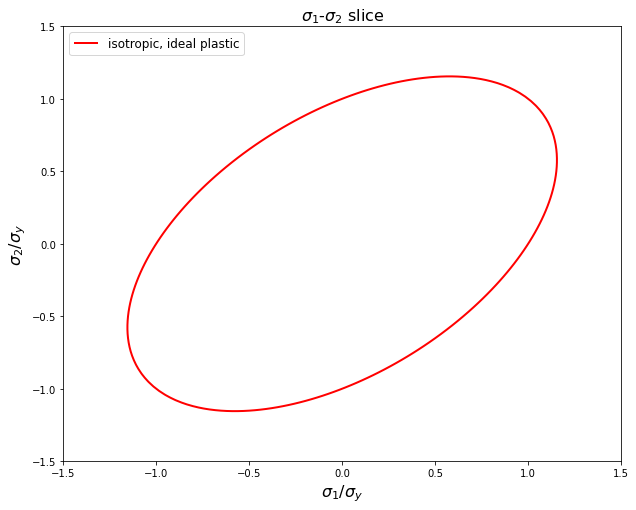

In [3]:
'Plot yield locus'
mat1.plot_yield_locus(xstart=-1.5, xend=1.5)

It is seen that the typical von Mises-ellipsis is obtained, which is characteristic for isotropic plasticity. 

Since the material does not sustain stresses outside the yield locus, plastic flow must occur in a way to keep the stress on the yield locus. Numerically, this is achieved by testing whether an elastic predictor step produces a stress outside the yield locus, i.e., with a positive yield function. If this is the case, a plastic strain increment must be calculated that leads again to an accepted stress state on the yield locus. The return mapping algorithm to calculate such strain increments has been described in many text books on continuum plasticity; the implementation in pyLabFEA  follows the book of De Borst, Crisfield, Remmers, and Verhoosel "Nonlinear finite element analysis of solids and structures" (John Wiley & Sons, 2012). According to the Prandtl-Reuss flow rule, the plastic strain increment for a given time step can be calculated as

\begin{equation}
\label{eq_epr}
\dot\epsilon_{pl} = \dot{\lambda} \frac{\partial f}{\partial \sigma}= \dot{\lambda}{n} \, ,
\end{equation}

where ${n}$ is the normal vector to the yield locus, defined by the gradient of the yield function $\partial f/\partial \sigma_i$ ($i=1,2,3)$, and $\dot{\lambda}>0$ is the so-called plastic strain multiplier that can be evaluated as

\begin{equation}
\dot{\lambda} = \frac{{n} \cdot {C}{\dot{\epsilon}}}{{n} \cdot {C} {n}} \, ,
\end{equation}

where $\dot{\epsilon}$ is the total strain increment of the FEA predictor step that leads to a stress state outside the yield locus and which is consequently decomposed into the plastic strain increment and the elastic strain increment - or stress increment - given by

\begin{equation}
\dot{\sigma} = {C}_t \dot{\epsilon}
\end{equation}

with the tangent stiffness tensor

\begin{equation}
{C}_t = {C} - \frac{{C} {n} \otimes {C} {n}}
         {{n} \cdot {C} {n}}
\end{equation}

where '$\otimes$' denotes the tensorial product in the form $a_i \otimes b_j = a_i b_j$. 

The method ``calc_properties`` can be invoked to evaluate the flow behavior of the defined material under different load cases: (i) uniaxial stress in horizontal direction, (ii) uniaxial stress in vertical direction, (iii) equibiaxial strain under plane stress conditions, and (iv) pure shear under plane stress conditions. This is achieved by internally calling a finite element simulation to apply these load cases to the material. To plot the obtained stress-strain curves, the method ``plot_stress_strain`` is called, which also produces a text output.

---------------------------------------------------------
J2 yield stress under uniax-x loading: 300.0 MPa
---------------------------------------------------------
J2 yield stress under uniax-y loading: 300.0 MPa
---------------------------------------------------------
J2 yield stress under equibiax loading: 300.0 MPa
---------------------------------------------------------
J2 yield stress under shear loading: 300.0 MPa
---------------------------------------------------------


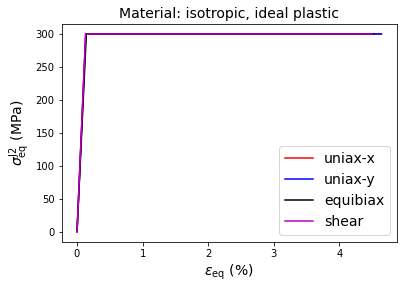

In [4]:
'Calculate and plot stress strain curves of materials'
mat1.calc_properties(eps=0.05, sigeps=True) # calculate the stress-strain curves up to a total strain of 5%
mat1.plot_stress_strain()

As expected for an isotropic material, all load cases result in the same stress-strain curve, when plotted as equivalent stress vs. equivalent strain.

## 2. Work hardening
In the next step, two more materials will be defined, with identical elastic properties and identical yield strength as the first material, but with different work hardening behavior, as seen in the stress-strain curves.

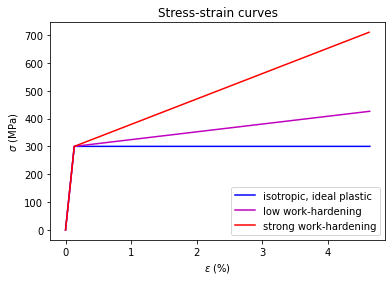

In [5]:
'Define two more materials with different work-hardening rates'
mat2 = Material(name="low work-hardening")    # define second material
mat2.elasticity(E=200.e3, nu=0.3)             # identic elastic properties as mat1
mat2.plasticity(sy=300., khard=10.e3)         # ssame yield strength as mat1, low w.h. coefficient
mat3 = Material(name="strong work-hardening") # define third material
mat3.elasticity(E=200.e3, nu=0.3)             # identic elastic properties as mat1
mat3.plasticity(sy=300., khard=30.e3)         # same yield strength as mat1 and mat2, high w.h. coefficient
mat2.calc_properties(verb=False, eps=0.05, sigeps=True)
mat3.calc_properties(verb=False, eps=0.05, sigeps=True)

plt.plot(mat1.prop['stx']['eeq']*100., mat1.prop['stx']['seq'], '-b')
plt.plot(mat2.prop['stx']['eeq']*100., mat2.prop['stx']['seq'], '-m')
plt.plot(mat3.prop['stx']['eeq']*100., mat3.prop['stx']['seq'], '-r')
plt.title('Stress-strain curves')
plt.xlabel(r'$\epsilon$ (%)')
plt.ylabel(r'$\sigma$ (MPa)')
plt.legend([mat1.name, mat2.name, mat3.name], loc='lower right')
plt.show()

## 3. Application in Finite Element Analysis

The materials defined are used in a finite element model, in which 3 different sections are assigned to the 3 different materials. This model is subjected to a unixial tensile stress in vertical direction, and the mechanical response of the model is analyzed in terms of total strain, plastic strain, and stress. All lengths are given in units of 1 mm.

2-d Model: uniaxial stress, isostrain condition
-----------------------------------------------
Global total strain: (eps_xx, eps_yy) = (-0.001,  0.002)
Local total strain (elements in different sections, Voigt tensor):
[-0.001  0.002 -0.001  0.     0.     0.   ]  in Section 1, Material: isotropic, ideal plastic
[-0.001  0.002 -0.001  0.     0.    -0.   ]  in Section 2, Material: low work-hardening
[-0.001  0.002 -0.001  0.     0.    -0.   ]  in Section 3, Material: strong work-hardening
Total strain in vertical direction: isostrain condition fulfilled


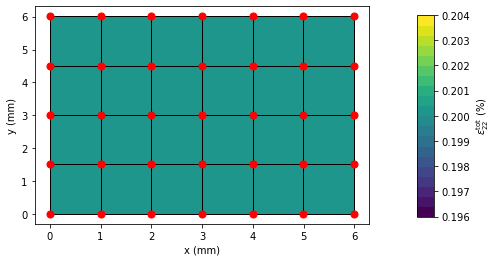

Total strain in horizontal direction:
slightly different cross-contraction due to different plastic properties in model sections


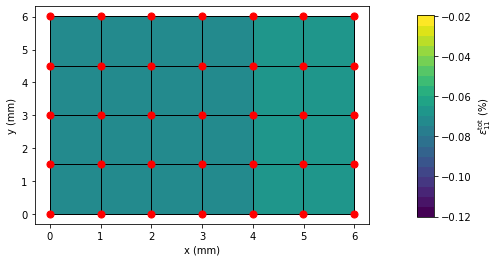

Equivalent total strain


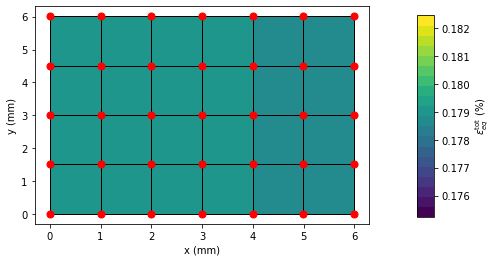

In [6]:
'laminate model is generated and elastic-plastic properties are assigned to each section'
fem = FE.Model(dim=2, planestress=True)   # call class to generate object for finite element model
fem.geom([2, 2, 2], LY=6.)    # define sections in absolute lengths
fem.assign([mat1, mat2, mat3])  # assign the proper material to each section
fmat1 = 1./3.   # identical volume fraction for each material
fmat2 = 1./3.
fmat3 = 1./3.
'boundary conditions: uniaxial stress in longitudinal direction'
etot = 0.002
fem.bcleft(0.)                     # fix left and bottom boundary
fem.bcbot(0.)
fem.bcright(0., 'force')           # free boundary condition on right edge of model
fem.bctop(etot*fem.leny, 'disp')  # strain applied to top nodes
'solution and evalutation of effective properties'
fem.mesh(NX=6, NY=4) # create mesh
fem.solve()           # solve system of equations
fem.calc_global()     # calculate global stress and strain
print('2-d Model: uniaxial stress, isostrain condition')
print('-----------------------------------------------')
print('Global total strain: (eps_xx, eps_yy) = (%6.3f, %6.3f)' % (fem.glob['eps'][0], fem.glob['eps'][1]))
print('Local total strain (elements in different sections, Voigt tensor):')
print(fem.element[0].eps.round(decimals=3),' in Section 1, Material:',fem.element[0].Mat.name)
print(fem.element[8].eps.round(decimals=3),' in Section 2, Material:',fem.element[8].Mat.name)
print(fem.element[16].eps.round(decimals=3),' in Section 3, Material:',fem.element[16].Mat.name)
'create graphical output of total strains in FE model'
print('Total strain in vertical direction: isostrain condition fulfilled')
fem.plot('strain2')
print('Total strain in horizontal direction:')
print('slightly different cross-contraction due to different plastic properties in model sections')
fem.plot('strain1')
print('Equivalent total strain')
fem.plot('etot')

Since isostrain conditions are applied, the global total strain in vertical direction is identical in all elements, irrespective of their section and the assigned material. However, due to the differences in work hardening, slight changes in the horizontal strain show up. Next, we take a look at the plastic strains:

Global plastic strain: (epl_xx, epl_yy) = (-0.000245,  0.000491)
Local plastic strain (elements in different sections, Voigt tensor):
[-0.00025  0.0005  -0.00025  0.       0.       0.     ]  in Section 1, Material: isotropic, ideal plastic
[-0.000247  0.000494 -0.000247  0.        0.        0.      ]  in Section 2, Material: low work-hardening
[-0.000239  0.000479 -0.000239  0.        0.        0.      ]  in Section 3, Material: strong work-hardening
Plastic strain in vertical direction: differences due to work hardening


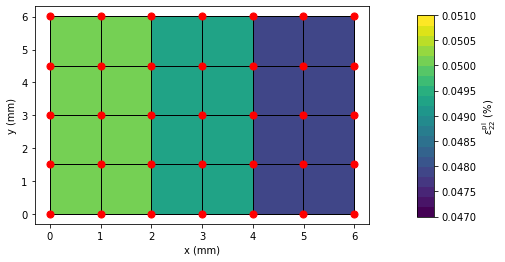

Plastic strain in horizontal direction: different plastic cross-contraction


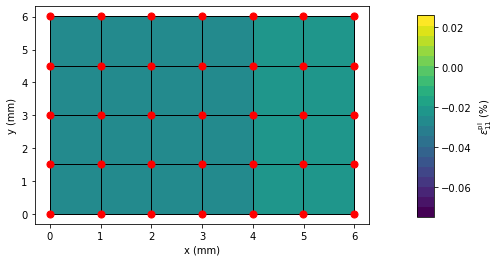

Equivalent plastic strain


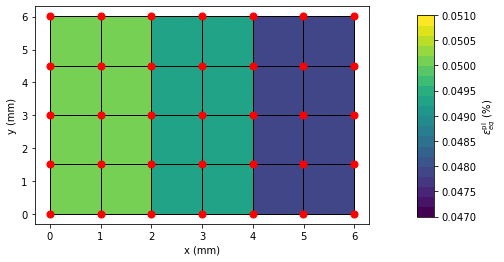

In [7]:
print('Global plastic strain: (epl_xx, epl_yy) = (%9.6f, %9.6f)' 
      % (fem.glob['epl'][0], fem.glob['epl'][1]))
print('Local plastic strain (elements in different sections, Voigt tensor):')
print(fem.element[0].epl.round(decimals=6),' in Section 1, Material:',fem.element[0].Mat.name)
print(fem.element[8].epl.round(decimals=6),' in Section 2, Material:',fem.element[8].Mat.name)
print(fem.element[16].epl.round(decimals=6),' in Section 3, Material:',fem.element[16].Mat.name)
'create graphical output of plastic strains in FE model'
print('Plastic strain in vertical direction: differences due to work hardening')
fem.plot('plastic2',vmin=0.047,vmax=0.051)
print('Plastic strain in horizontal direction: different plastic cross-contraction')
fem.plot('plastic1')
print('Equivalent plastic strain')
fem.plot('peeq',vmin=0.047,vmax=0.051)

Global stress: (sig_xx, sig_yy) = (-0.000, 301.841) MPa
Local stress (elements in different sections, Voigt tensor) (MPa):
[ -0. 300.   0.   0.   0.   0.]  in Section 1, Material: isotropic, ideal plastic
[ -0.    301.299   0.      0.      0.     -0.   ]  in Section 2, Material: low work-hardening
[ -0.    304.225   0.      0.      0.     -0.   ]  in Section 3, Material: strong work-hardening
Stress in vertical direction: different flow stresses at constant strain


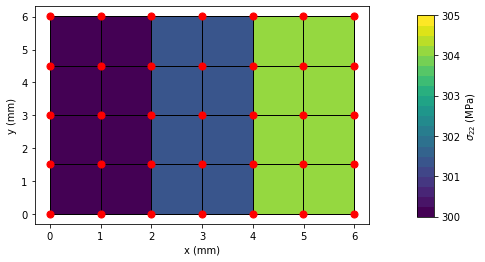

Stress in horizontal direction: uniaxial stress condition fulfilled


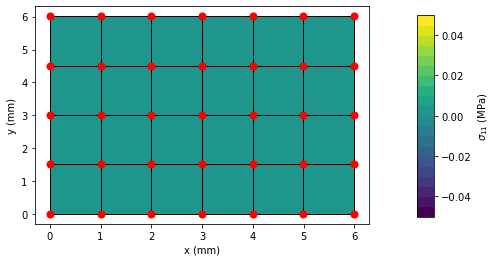

Equivalent stress: different flow stresses at constant strain


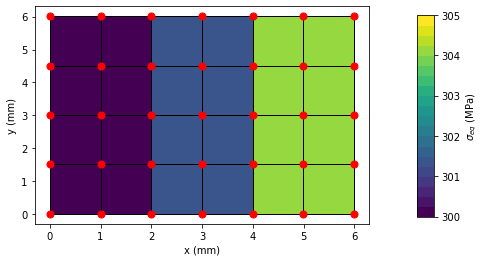

In [8]:
print('Global stress: (sig_xx, sig_yy) = (%6.3f, %6.3f) MPa' 
      % (fem.glob['sig'][0], fem.glob['sig'][1]))
print('Local stress (elements in different sections, Voigt tensor) (MPa):')
print(fem.element[0].sig.round(decimals=3),' in Section 1, Material:',fem.element[0].Mat.name)
print(fem.element[8].sig.round(decimals=3),' in Section 2, Material:',fem.element[8].Mat.name)
print(fem.element[16].sig.round(decimals=3),' in Section 3, Material:',fem.element[16].Mat.name)
'create graphical output of stress in FE model'
print('Stress in vertical direction: different flow stresses at constant strain')
fem.plot('stress2',vmin=300,vmax=305)
print('Stress in horizontal direction: uniaxial stress condition fulfilled')
fem.plot('stress1')
print('Equivalent stress: different flow stresses at constant strain')
fem.plot('seq',vmin=300,vmax=305)

## 4. Anisotropic materials

The pyLabFEA package also allows the definition of plastically anisotropic materials. When defining the plastic properties, the parameter ``hill``$=[H_1, H_2, H_3]$ can be used to define orthotropic plastic properties in a Hill-like manner. The parameters are taken into account in a generalized equivalent stress

\begin{equation} 
\sigma_{eq} = \sqrt{ \frac{1}{2}\left[ H_1 \left(\sigma_1-\sigma_2\right)^2 
                       + H_2 \left(\sigma_2-\sigma_3\right)^2 
                       + H_3 \left(\sigma_3-\sigma_1\right)^2   \right] } .
\end{equation}

In the first step, the yield locus of an anisotropic material is plotted together with the isotropic reference material ``mat1``. Furthermore, the stresses obtained during the plastic deformation in the internal calculation of the stress-strain curves under the different loading conditions are also shown.

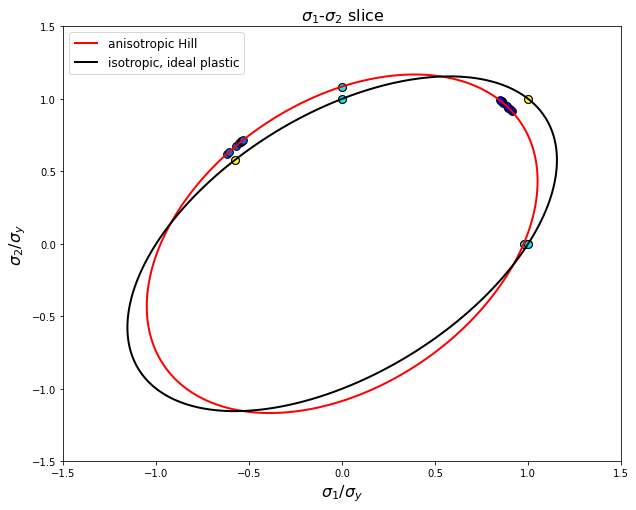

In [12]:
'Material with anistropic plasticity as described by Hill-parameters'
tol = FE.ptol   # save tolerance original parameter
FE.ptol = 0.4   # increase tolerance value to speed up calculation for strongly anisotropic material
mat_an = Material(name='anisotropic Hill')
mat_an.elasticity(E=E, nu=nu)
mat_an.plasticity(sy=sy, hill=[0.7,1.,1.4])
mat_an.calc_properties(eps=0.005, sigeps=True)
FE.ptol = tol  # reset tolerance to its original value

'plot yield locus'
ax = mat_an.plot_yield_locus(xstart=-1.5, xend=1.5, ref_mat=mat1)
'plot evolution of stresses during loading for anisoptropy ...'
stx = mat_an.sigeps['stx']['sig'][:,0:2]/mat_an.sy
sty = mat_an.sigeps['sty']['sig'][:,0:2]/mat_an.sy
et2 = mat_an.sigeps['et2']['sig'][:,0:2]/mat_an.sy
ect = mat_an.sigeps['ect']['sig'][:,0:2]/mat_an.sy
ax.scatter(stx[1:,0],stx[1:,1],s=60, c='#00f0ff', edgecolors='k')
ax.scatter(sty[1:,0],sty[1:,1],s=60, c='#00f0ff', edgecolors='k')
ax.scatter(et2[1:,0],et2[1:,1],s=60, c='#0000ff', edgecolors='k')
ax.scatter(ect[1:,0],ect[1:,1],s=60, c='#0060ff', edgecolors='k')
'... and for the isotropic material mat1'
stx = mat1.sigeps['stx']['sig'][:,0:2]/mat1.sy
sty = mat1.sigeps['sty']['sig'][:,0:2]/mat1.sy
et2 = mat1.sigeps['et2']['sig'][:,0:2]/mat1.sy
ect = mat1.sigeps['ect']['sig'][:,0:2]/mat1.sy
ax.scatter(stx[1:,0],stx[1:,1],s=60, c='#00f0ff', edgecolors='k')
ax.scatter(sty[1:,0],sty[1:,1],s=60, c='#00f0ff', edgecolors='k')
ax.scatter(et2[1:,0],et2[1:,1],s=60, c='#ffff00', edgecolors='k')
ax.scatter(ect[1:,0],ect[1:,1],s=60, c='#ffff00', edgecolors='k')

It is seen how the shape of the yield locus gets deformed by the anisotropy paramaters. Furthermore, the graph shows that all obtained stress values during the calculation of the stress-strain curves lie on the yield locus. For both materials shown here, ideal plasticity is assumed such that the yield locus is not changed during plastic deformation. For the anisotropic material, the flow stresses obtained under equibiaxial strain and pure shear strain move on the yield locus, which is a consequence of the material anisotropy that changes the stress state during strain controled loading conditions. For loading cases leading to uniaxial stresses, the flow stress remains on on the same spot of the yield locus by definition.

Finally, the obtained stress strain courves are plotted for the two definitions of the equivalent stress: (i) isotropic J2 equivalent stress, (ii) Hill-like anisotropic equivalent stress.

---------------------------------------------------------
J2 yield stress under uniax-x loading: 292.77 MPa
---------------------------------------------------------
J2 yield stress under uniax-y loading: 325.396 MPa
---------------------------------------------------------
J2 yield stress under equibiax loading: 273.861 MPa
---------------------------------------------------------
J2 yield stress under shear loading: 322.252 MPa
---------------------------------------------------------


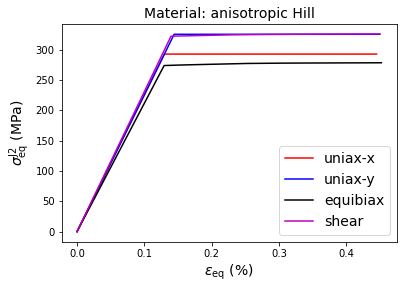

Hill yield stress under uniax-x loading: 300.0 MPa
---------------------------------------------------------
Hill yield stress under uniax-y loading: 300.0 MPa
---------------------------------------------------------
Hill yield stress under equibiax loading: 300.0 MPa
---------------------------------------------------------
Hill yield stress under shear loading: 300.0 MPa
---------------------------------------------------------


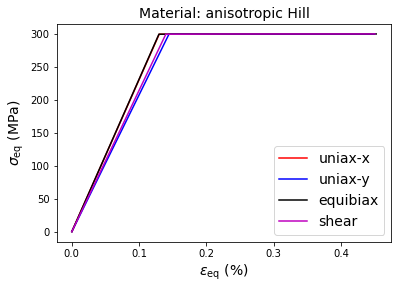

In [13]:
mat_an.plot_stress_strain(Hill=True)

It can be seen that for anisotropy the two different ways to define the equivalent stress, result in different values describing the same material under the same loading conditions. While the J2 equivalent stress reveales the anisotropy of the material in different yield stresses, depending on the loading direction, the equivalent stress after Hill maps the yield stresses on a constant strength value. Note, that the nominal yield strength of the material is the constant in both cases.

## 5. Summary
This tutorial demonstrates the non-linear FEA with the pyLabFEA package. Yield loci and stress-strain curves for materials with isotropic plasticity and Hill-like anisotropic behavior are analysed. FE models with materials exhibiting different work hardening rates are generated and applied.

## 6. Exercises
- Create materials with different initial strengths and different work hardening rates and compare the results of the FE model.
- Create materials with identical plastic properties but different elasticity constants and compare the results of the FEA for loading in different directions.
- Combine different materials with identical yield strengths and work hardening rates, but differnt Hill parameters in one FE model and discuss the results.